## Homework - Machine Learning Preparation
## KELOMPOK 2 Infolvators


```
M Arvin Fadriansyah
M Rizqi Fadhilah
Melliza Nastasia Izazi
Thufael Bintang Alfattah
Zulfikar fauzi
Annisa Sulistyaningsih
Niken Mustikaweni
galih refa
```



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


# Load and Describe Data

## Load Data

In [ ]:
# Import library yang digunakan
import pandas as pd

# Proses ekstraksi data
df = pd.read_csv('Product_Exclusive_Classification.csv')

# Tampilkan hasilnya
display(df)

id                    brand     category  rating  \
0          50       SEPHORA COLLECTION  no category     5.0   
1         304       SEPHORA COLLECTION  no category     0.0   
2         404       SEPHORA COLLECTION  no category     0.0   
3         443       SEPHORA COLLECTION  no category     0.0   
4         463       SEPHORA COLLECTION  no category     0.0   
...       ...                      ...          ...     ...   
7995  2293207                  VOLUSPA      Candles     0.0   
7996  2293439                 TOM FORD     Lipstick     4.0   
7997  2293488  FENTY BEAUTY by Rihanna     Lip Sets     4.5   
7998  2293793                    tarte      Mascara     4.5   
7999  2293801            John Varvatos      Perfume     0.0   

      number_of_reviews     love  price  value_price  exclusive  
0                  46.0      0.0   50.0         50.0          0  
1                   0.0      0.0   50.0         50.0          0  
2                   0.0      0.0   50.0         50.0          0  
3                   0.0      0.0   50.0         50.0          0  
4                   0.0      0.0   50.0         50.0          0  
...                 ...      ...    ...          ...        ...  
7995                0.0    194.0   85.0         85.0          0  
7996               30.0  12400.0   55.0         55.0          0  
7997               22.0  12900.0   29.0         34.0          1  
7998                5.0   2400.0   12.0         12.0          0  
7999                0.0     60.0   94.0         94.0          0  

[8000 rows x 9 columns]

## 1. Descriptive Statistics (5 poin)
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti: <br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) <br>

* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai”


**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**

In [ ]:
df.info()

NameError: name 'df' is not defined

Dari data yang disajikan dirasa **tidak ada yang janggal atau kurang sesuai dengan tipe datanya.** Jikalau ada maka memungkinkan itu pada kolom ID dimana kolom ID bisa saja bertipe data Int ataupun bertipe data String(Object).

**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

In [ ]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

Tentu ada **beberapa nilai kosong** atau Missing Value yang bisa dilihat hasilnya :
- category
- rating
- number_of_reviews
- love
- price
- value_price

Sementara **Kolom yang tidak memiliki nilai kosong** atau tidak terdapat missing value adalah
- id
- brand
- exclusive

**C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)**

In [ ]:
# Melakukan pengkategorian
cats = ['id','brand','category']
num = ['rating', 'number_of_reviews','love','price','value_price','exclusive']

**Analisa Kolom Numerical**

In [ ]:
df[num].describe().T

count          mean           std  min     25%     50%  \
rating             7905.0      4.085136      0.761069  0.0     4.0     4.0   
number_of_reviews  7991.0    303.574396    931.724460  0.0    14.0    56.0   
love               7966.0  17563.958951  44253.391743  0.0  2000.0  5500.0   
price              7992.0     49.900935     46.864764  2.0    24.0    35.0   
value_price        7983.0     50.983300     48.473049  2.0    24.0    35.0   
exclusive          8000.0      0.255875      0.436379  0.0     0.0     0.0   

                       75%        max  
rating                 4.5        5.0  
number_of_reviews    231.5    19000.0  
love               15300.0  1300000.0  
price                 59.0      549.0  
value_price           60.0      549.0  
exclusive              1.0        1.0

1. Kolom `rating`, `number_of_reviews`, `love`, `price`, `value_price`, dan `exclusive`  tidak ada issue pada nilai min/max
2. Semua kolom nilainya masih masuk akal
3. Kolom `number_of_reviews` ada perbedaan yang cukup janggal pada bagian Mean dan std
4. Kolom `love`  juga memiliki perbedaan yang jauh dari mean dan std.

**Analisa Kolom Category**

In [ ]:
df[cats] = df[cats].astype(str)

In [ ]:
df[cats].describe().T

count unique                 top freq
id        8000   7951             1723881    2
brand     8000    310  SEPHORA COLLECTION  492
category  8000    143             Perfume  619

1. Kolom `brand` didominasi oleh Sephora Collection,
2. Kolom `category` didominasi oleh kategori Perfume

##2. Univariate Analysis (10 poin)
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.


In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

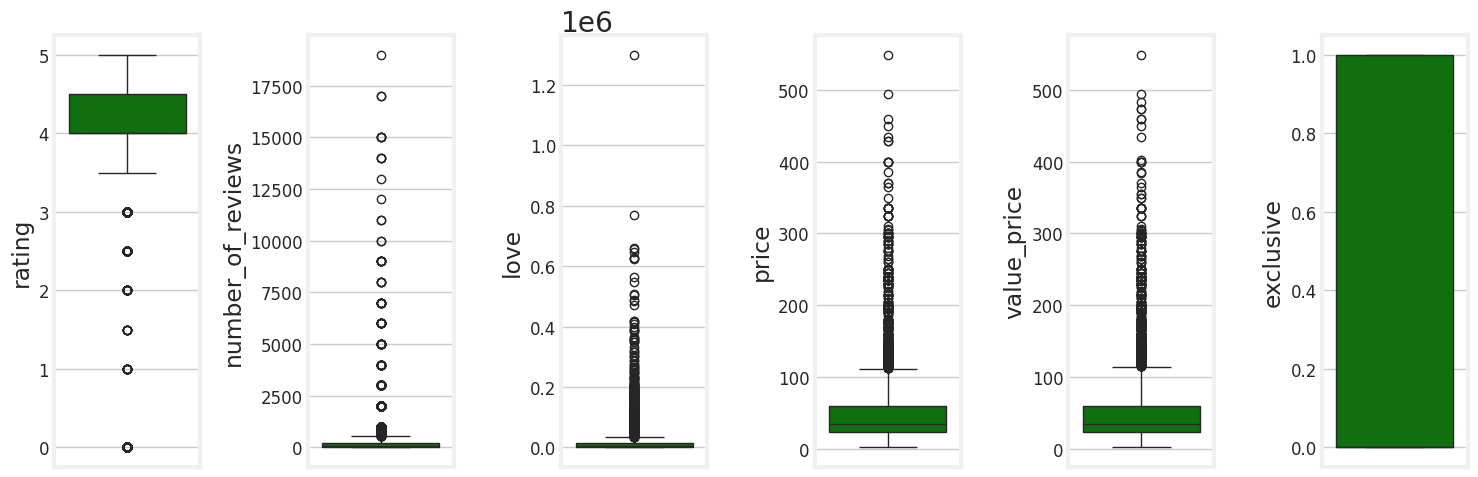

In [ ]:
#boxplot

features = num
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tick_params(axis='y', labelsize=12)  # Mengatur ukuran font ticks pada sumbu y
plt.tight_layout()
plt.show()

**Pengamatan Boxplot**

Berdasarkan informasi yang Anda berikan, berikut adalah pengamatan dan interpretasi lanjutan dari boxplot:

**Outlier:**

`rating` dan `love`: Boxplot menunjukkan adanya outlier yang cukup signifikan pada kolom `rating` dan `love`. Hal ini berarti terdapat beberapa produk yang memiliki nilai `rating` dan `love` yang jauh berbeda dari mayoritas produk lainnya. Outlier ini perlu diinvestigasi lebih lanjut untuk memahami penyebabnya.

**Skewness:**

rating, number_of_reviews, love, price, value_price: Boxplot menunjukkan bahwa distribusi data pada kolom rating, number_of_reviews, love, price, dan value_price tidak simetris (skewed).

**Skewness ke kanan:** Distribusi data cenderung lebih banyak pada nilai yang lebih rendah.

Contoh: Pada kolom price, kemungkinan besar terdapat lebih banyak produk dengan harga murah dibandingkan produk dengan harga mahal.

**Skewness ke kiri:** Distribusi data cenderung lebih banyak pada nilai yang lebih tinggi.

Contoh: Pada kolom rating, kemungkinan besar terdapat lebih banyak produk dengan rating tinggi dibandingkan produk dengan rating rendah.



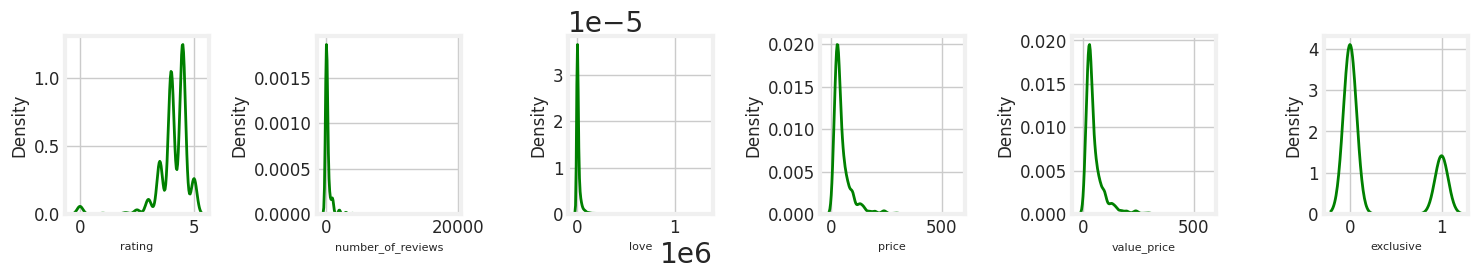

In [ ]:
#displot

plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i], fontsize=8)
    plt.tick_params(axis='both', labelsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.tight_layout()

**Pengamatan Distplot**:
- Seperti observasi pada box plot sebelumnya, kolom `number_of_reviews`, `love`, `price`, `value_price` memiliki distribusi positive skew,
- Kolom `rating` memiliki arah distribusi hampir mendekati normal
- Kolom `exclusive` memiliki arah distribusi bimodal.

Distribusi Data Kategori

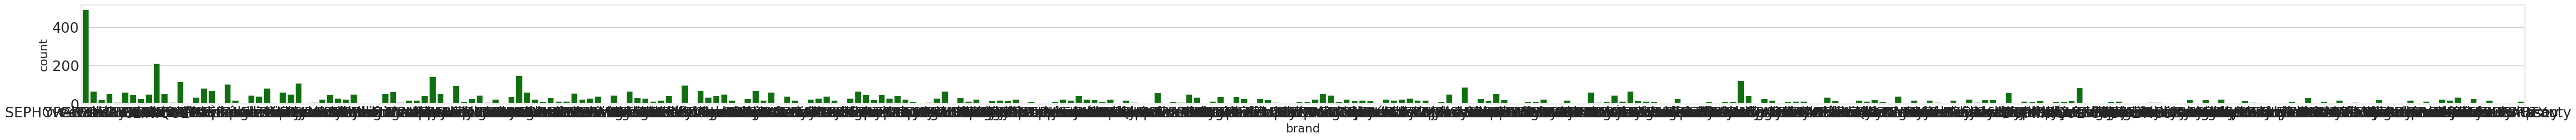

In [ ]:
#Kita membuat grafik untuk melihat count pada kolom brand
plt.figure(figsize=(150, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['brand'], color='green', orient='v')
plt.tight_layout();

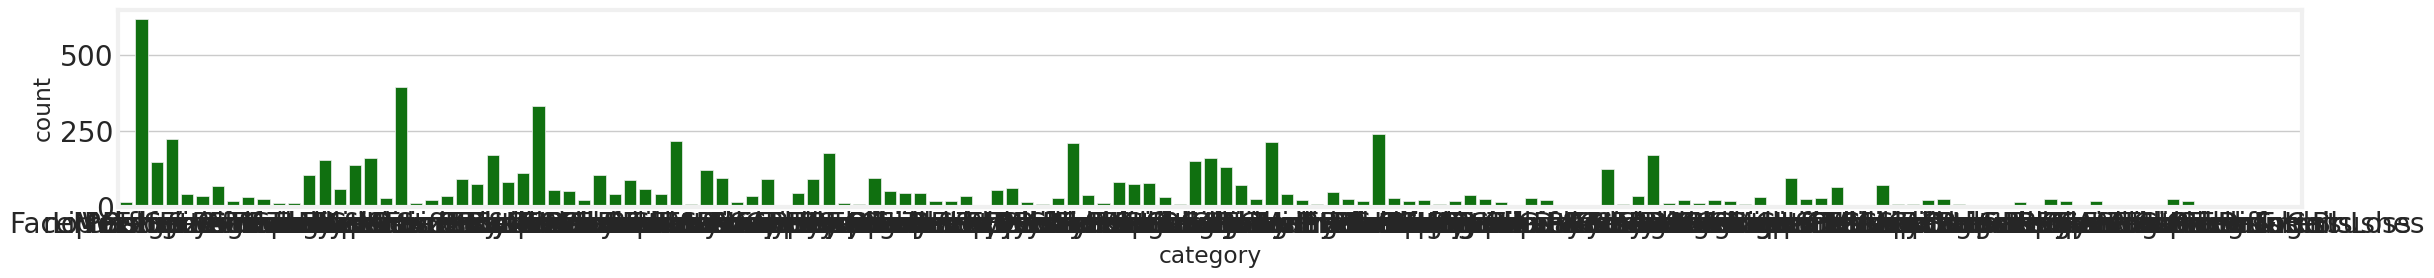

In [ ]:
#Lakukan hal yang sama untuk melihat dari kolom category
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = df['category'], color='green', orient='v')
plt.tight_layout();

**Pengamatan Countplot**:
1. Kolom `brand` dan `category` memiliki unique yang sangat banyak seperti pada gambar grafik dan perlu melakukan peninjauan kembali jika ingin membangun pemodelan

##3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi


In [ ]:
df[num].corr()

rating  number_of_reviews      love     price  \
rating             1.000000           0.065639  0.080472  0.053418   
number_of_reviews  0.065639           1.000000  0.744099 -0.087781   
love               0.080472           0.744099  1.000000 -0.092059   
price              0.053418          -0.087781 -0.092059  1.000000   
value_price        0.051654          -0.090106 -0.091681  0.987777   
exclusive         -0.015293           0.005316  0.054244 -0.184988   

                   value_price  exclusive  
rating                0.051654  -0.015293  
number_of_reviews    -0.090106   0.005316  
love                 -0.091681   0.054244  
price                 0.987777  -0.184988  
value_price           1.000000  -0.169355  
exclusive            -0.169355   1.000000

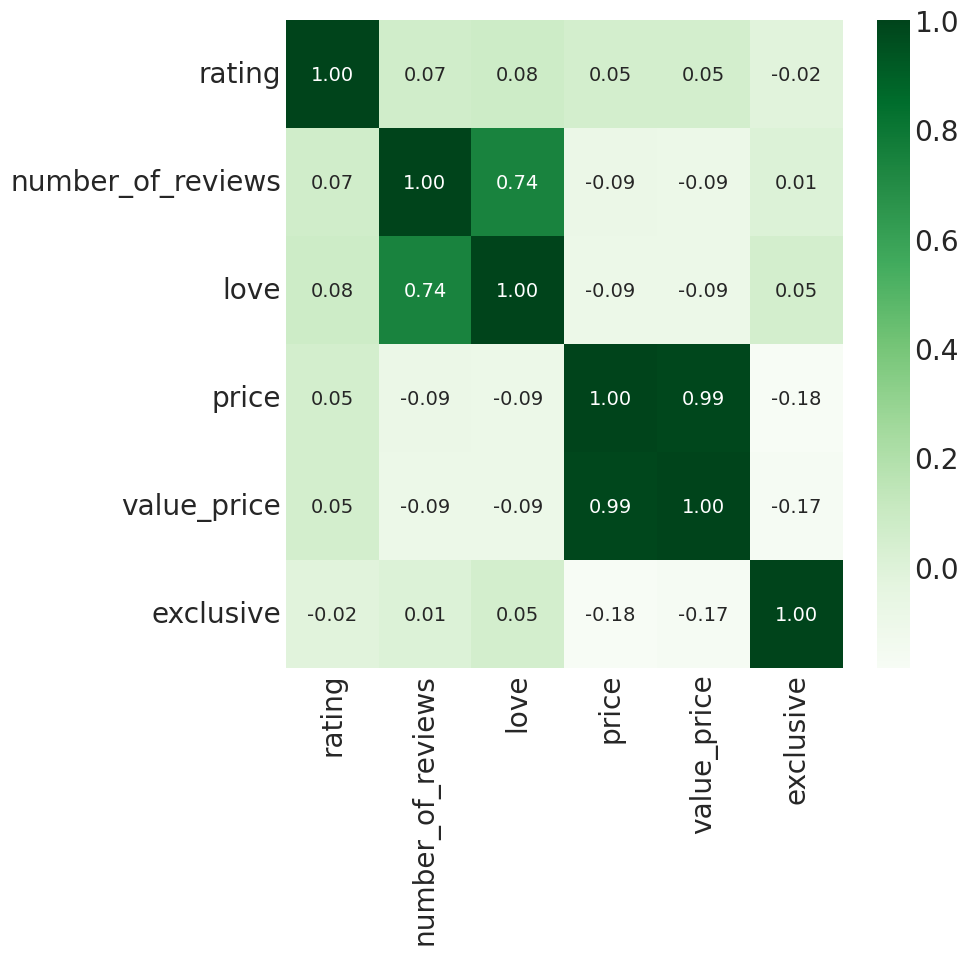

In [ ]:
#membangun grafik heatmap untuk melihat korelasi

plt.figure(figsize=(8, 8))
sns.heatmap(df[num].corr(), cmap='Greens', annot=True, fmt='.2f');

**Dari *correlation heatmap* di atas dapat dilihat bahwa:**
* Jika melihat target (price) dari analisis ini adalah `price` dan memiliki korelasi positif sangat kuat dengan `value_price` (strong potential feature),
* Tetapi target `value_price` juga memiliki korelasi negatif dengan `number_of_reviews`, `love`, dan `exclusive` (decent potential feature),
* `price` memiliki korelasi negatif cukup kuat dengan `exclusive`. (Paling negatif)

<Figure size 1500x1500 with 0 Axes>

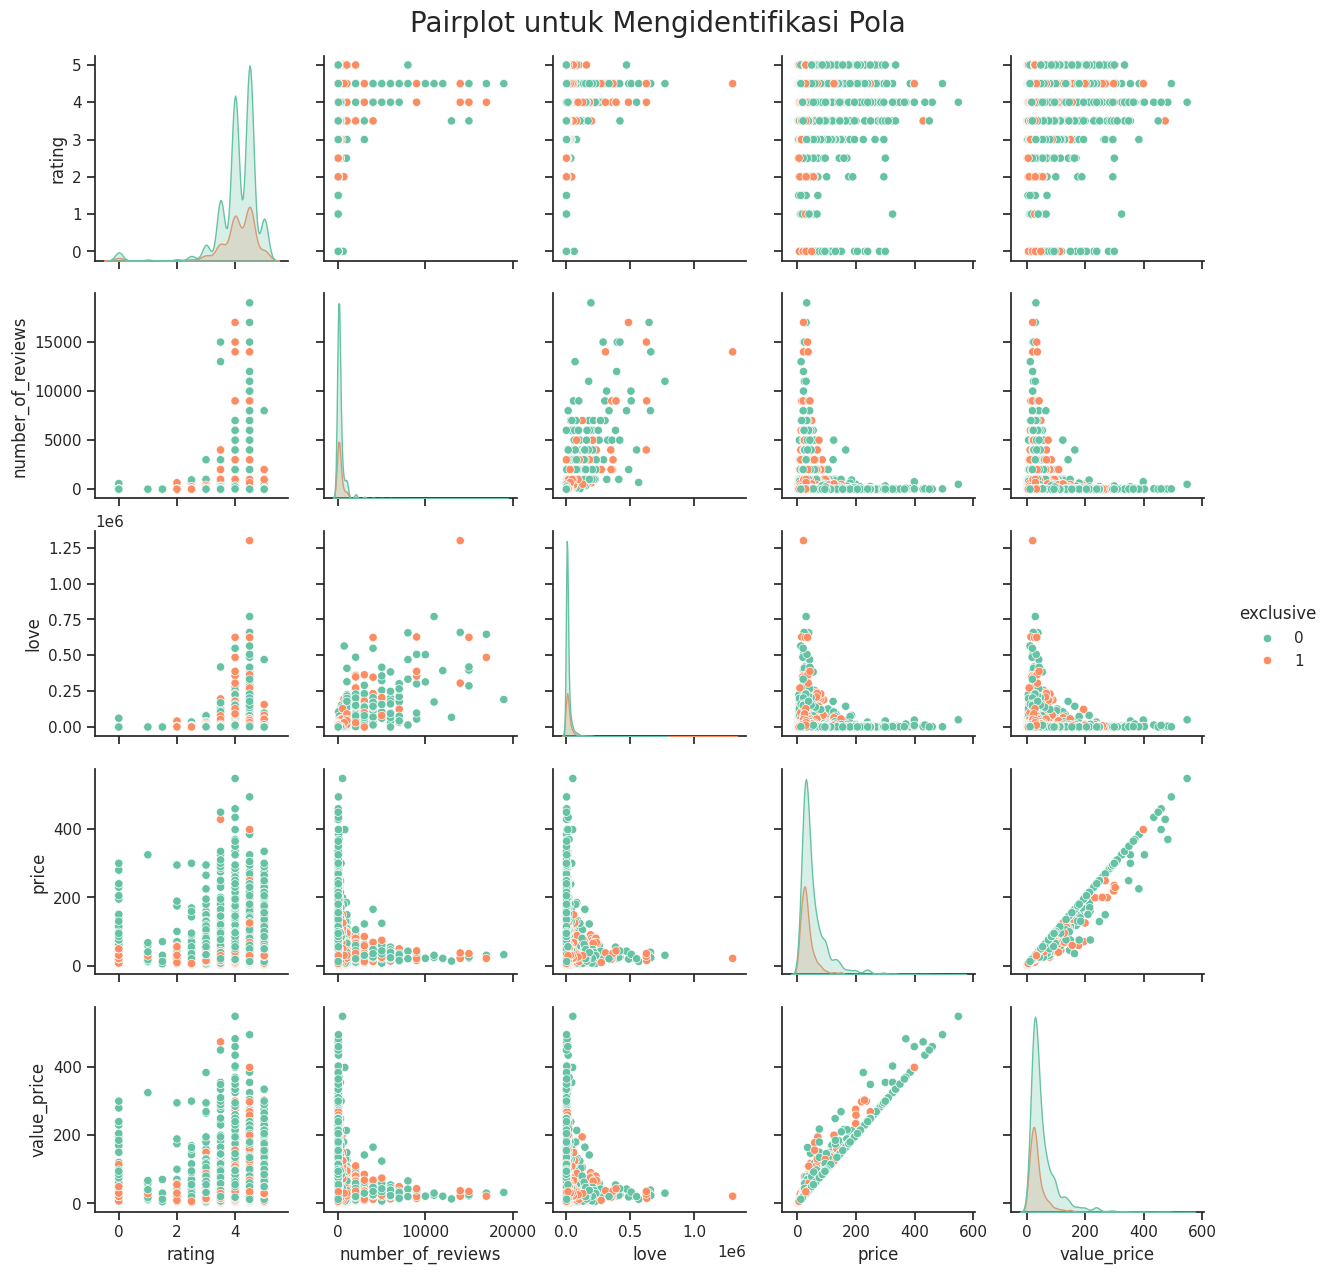

In [ ]:
# Pairplot untuk mengidentifikasi pola

# Mengatur gaya dan warna plot
sns.set(style='ticks', palette='Set2')

# Membuat pairplot dengan penyesuaian estetika
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='exclusive')

# Menambahkan judul untuk plot
plt.suptitle('Pairplot untuk Mengidentifikasi Pola', y=1.02, fontsize=20)

# Menyesuaikan ukuran font label pada sumbu x dan y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan plot
plt.show()

Hasil Grafik pairplot di atas, Menunjukan bahwa :
* `price` jelas memiliki korelasi linear dengan `value_price`
- Barang yang `exclusive` = 0 memiliki nilai `rating`, `price`, `value_price`, dan `number_of_reviews` lebih besar dibanding barang `exclusive` = 1

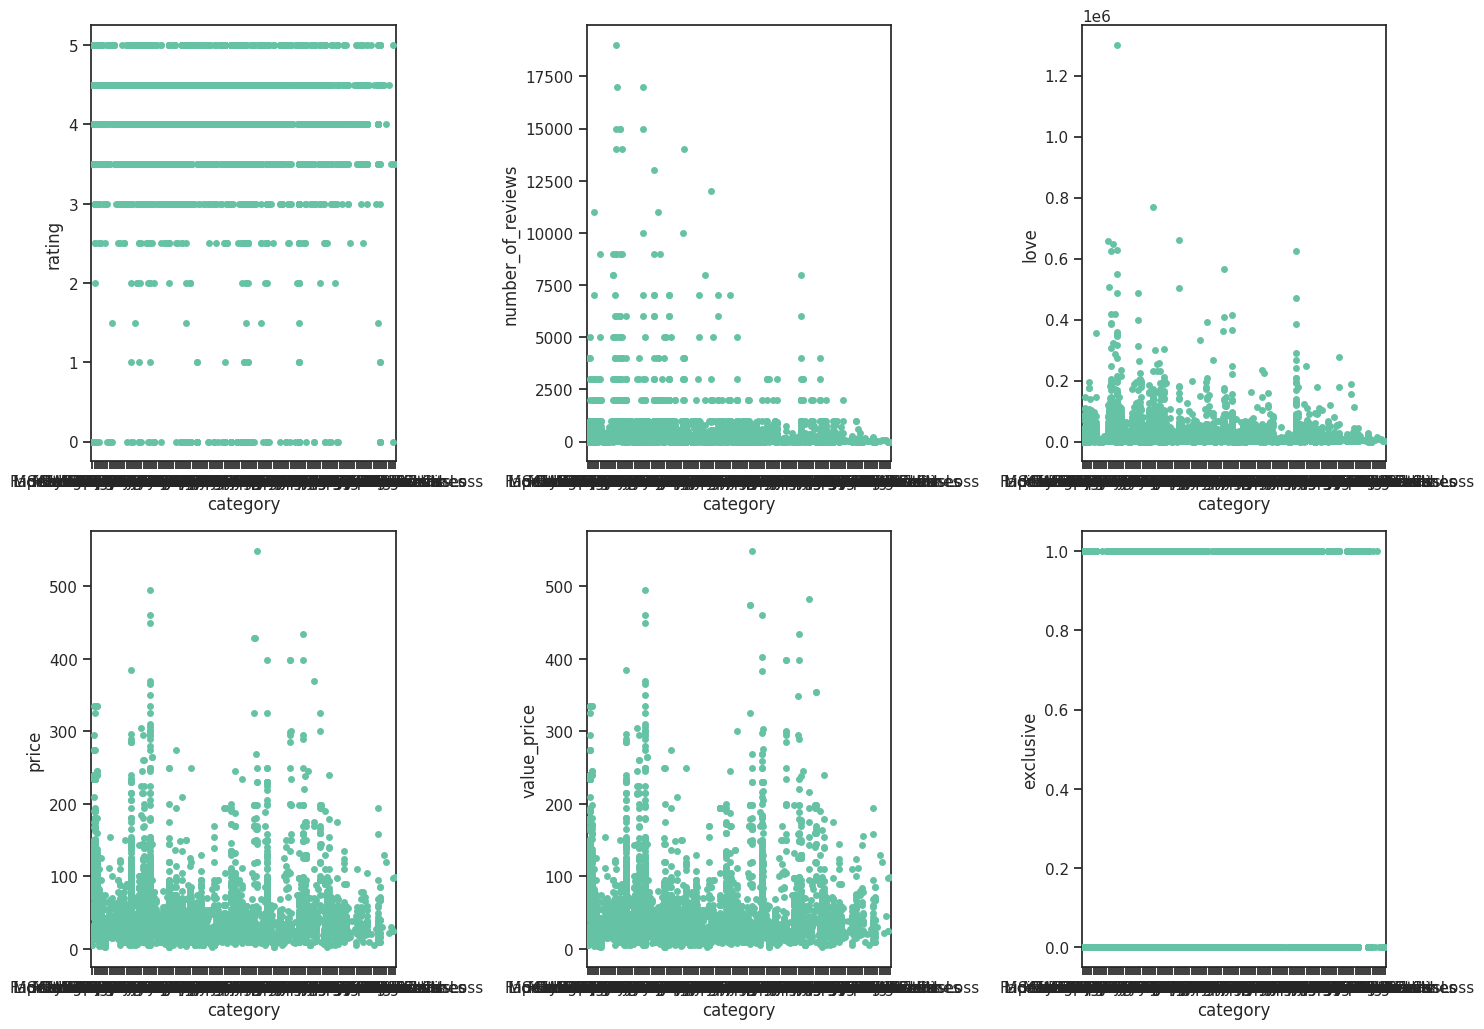

In [ ]:
# Korelasi kolom category dengan variable array berisi kolom numerical
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='category', y=num[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num) + 1)

Dari plot kategori , kita bisa melihat bahwa kolom category tidak memiliki korelasi terhadap kolom `numerical` yaitu `exclusive`

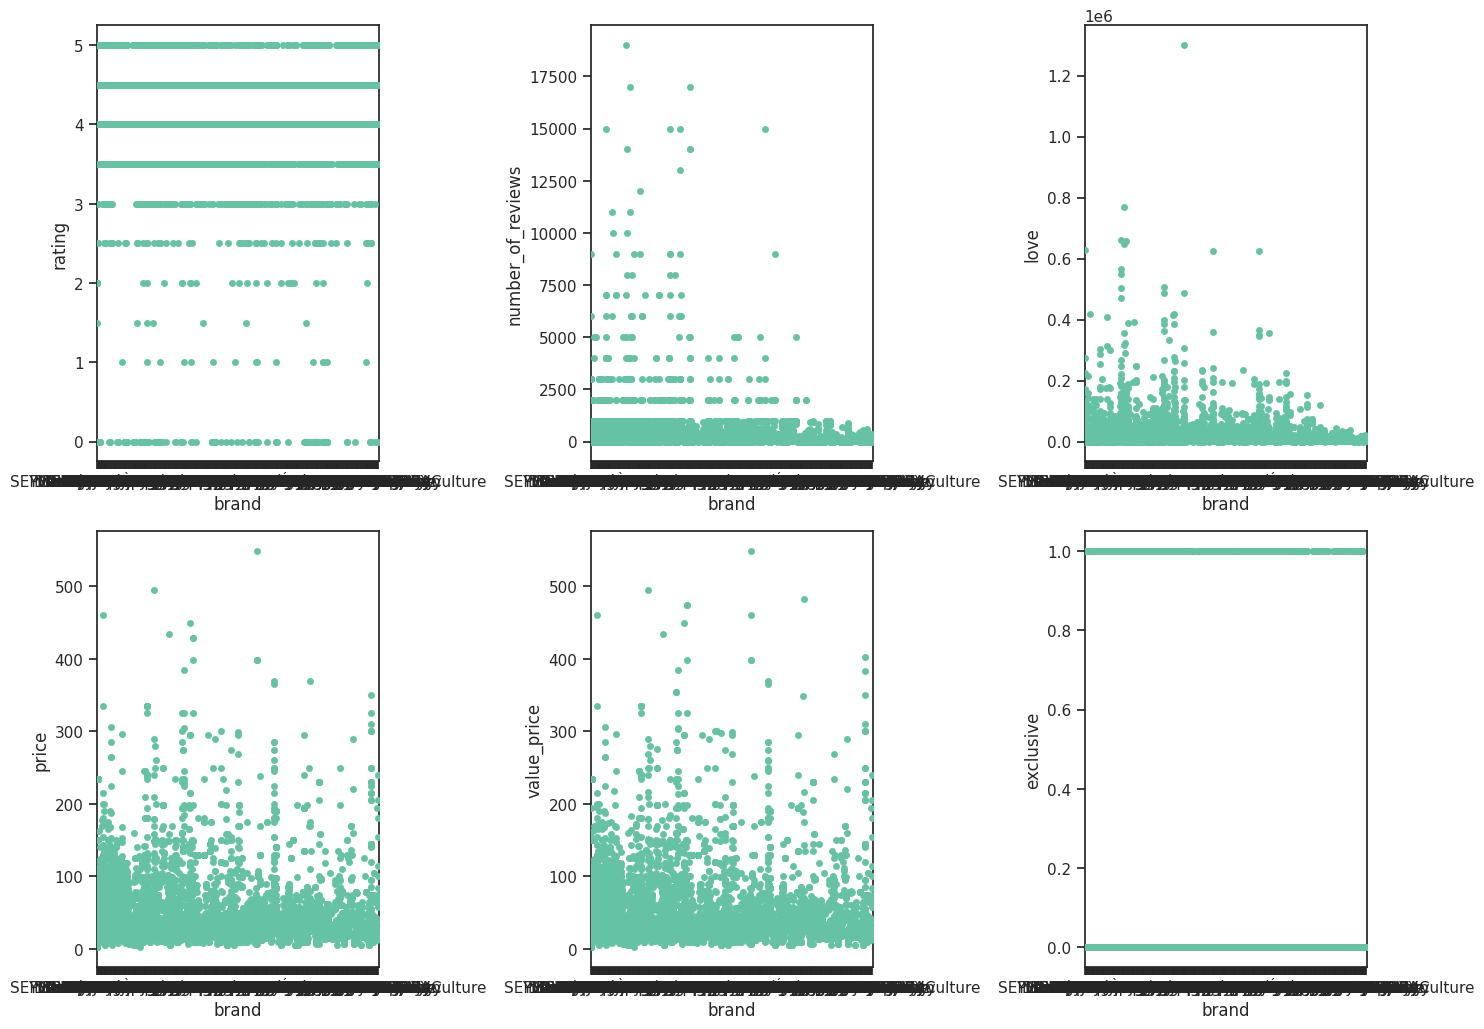

In [ ]:
# Korelasi kolom brand dengan variable array berisi kolom numerical
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='brand', y=num[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num) + 1)

Dari plot kategori , kita bisa melihat bahwa kolom brand tidak memiliki korelasi terhadap kolom `numerical` yaitu `exclusive`

##4. Data Cleansing (40 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti: <br>
A. Handle missing values <br>
B. Handle duplicated data <br>
C. Handle outliers <br>
D. Feature transformation <br>
E. Feature encoding <br>
F. Handle class imbalance <br>

Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).


**A. Handle missing value**

In [82]:
# Disini kita melakukan handle Missing Value, Dengan mengisi kolom kategorikal agar tidak ada nilai NaN
df['category'].fillna(df['category'].mode()[0], inplace=True)

# Melakukan drop value NaN pada kolom yang memiliki Missing Value
df = df.dropna(subset=['rating', 'number_of_reviews','love','price','value_price'])

Disini kita melakukan handle Missing Value, Dengan mengisi kolom kategorikal agar tidak ada nilai NaN, Melakukan drop value NaN pada kolom yang memiliki Missing Value.



**B. Handle duplicated data**

In [ ]:
df.duplicated().sum()

0

Tidak ada data terduplicate

**C. Handle outliers**

In [83]:
from scipy import stats

In [84]:
#menggunakan IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['rating','number_of_reviews','love','price','value_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7841
Jumlah baris setelah memfilter outlier: 5425


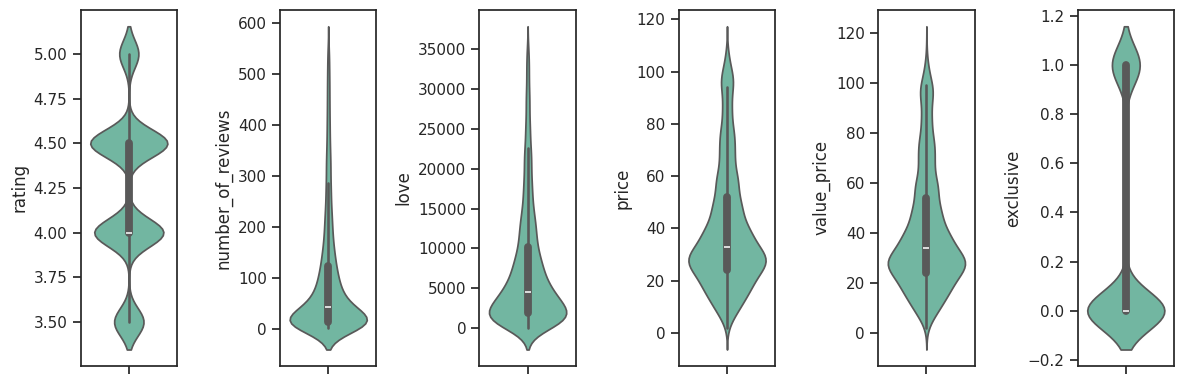

In [86]:
#Data setelah oulier difilter menggunakan violin plot
plt.figure(figsize = (12,4))
for i in range(0, len(num)):
    plt.subplot(1, 6, i+1)
    sns.violinplot(y = df[num[i]], orient='v')
    plt.tight_layout()

Plot ini adalah setelah melakukan handle outliers

**D. Feature Transformation**

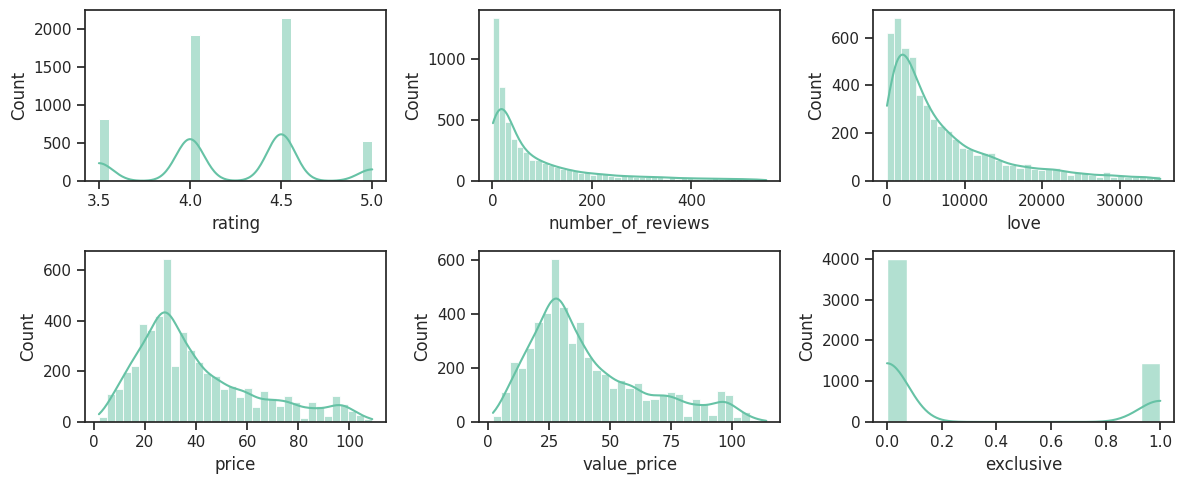

In [88]:
# Cek data sebelum dilakukan normalisasi (Penyetaraan Skala)
plt.figure(figsize = (12,5))
for i in range(0, len(num)):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[num[i]], kde=True)
    plt.tight_layout()

In [89]:
#Mengambil Library untuk melakukan normalisasi dengan menggunakan minmax dan standar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [90]:
# kolom rating, number_of_reviews, love, price, dan value_price kita re-scale ke [0,1]
df['rating'] = MinMaxScaler().fit_transform(df['rating'].values.reshape(len(df), 1))
df['number_of_reviews'] = MinMaxScaler().fit_transform(df['number_of_reviews'].values.reshape(len(df), 1))
df['love'] = MinMaxScaler().fit_transform(df['love'].values.reshape(len(df), 1))
df['price'] = MinMaxScaler().fit_transform(df['price'].values.reshape(len(df), 1))
df['value_price'] = MinMaxScaler().fit_transform(df['value_price'].values.reshape(len(df), 1))

In [91]:
df.describe()

id       rating  number_of_reviews         love        price  \
count  5.425000e+03  5425.000000        5425.000000  5425.000000  5425.000000   
mean   1.939179e+06     0.480492           0.165576     0.208160     0.354653   
std    3.565496e+05     0.287739           0.212563     0.211945     0.218385   
min    5.000000e+01     0.000000           0.000000     0.000000     0.000000   
25%    1.809235e+06     0.333333           0.023636     0.053977     0.205607   
50%    2.042794e+06     0.333333           0.074545     0.130682     0.289720   
75%    2.189405e+06     0.666667           0.221818     0.289773     0.467290   
max    2.293793e+06     1.000000           1.000000     1.000000     1.000000   

       value_price    exclusive  
count  5425.000000  5425.000000  
mean      0.345216     0.264700  
std       0.213128     0.441214  
min       0.000000     0.000000  
25%       0.196429     0.000000  
50%       0.285714     0.000000  
75%       0.464286     1.000000  
max       1.000000     1.000000

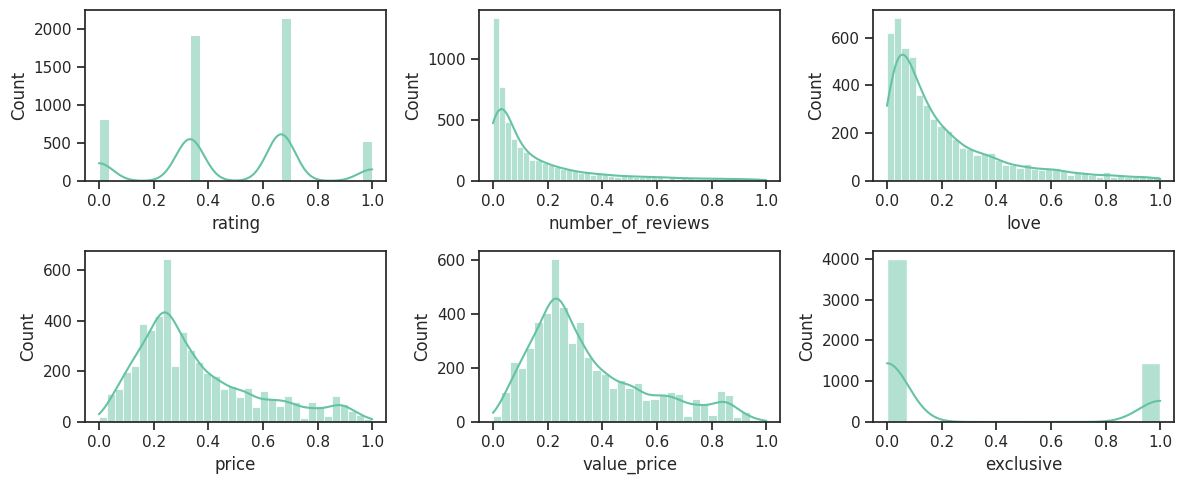

In [92]:
#Cek data setelah dinormalisasi

plt.figure(figsize = (12,5))
for i in range(0, len(num)):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[num[i]], kde=True)
    plt.tight_layout()

Berikut merupakan tampilan setelah melakukan feature tranformasi yaitu dengan melakukan normalisasi.

**E. Feature Encoding**

**Tidak dilakukan feature encoding** dikarenakan value counts **sangat besar **dalam artian count pada kolom kategorikal seperti `brand` dan `category` itu memiliki jumlah nama yang sangat banyak dan **tidak sesuai dengan ketentuan** yang harus dipenuhi jika ingin melakukan encoding.

**F. Handle class imbalance**

In [93]:
# Memberikan nama baru pada data exclusive yang memenuhi standar diatas 0.8
df['Tru_Exclusive'] = df['exclusive'] > 0.8

In [94]:
# menghitung hasil data yang
df['Tru_Exclusive'].value_counts()

Tru_Exclusive
False    3989
True     1436
Name: count, dtype: int64

**Standar Industri atau Domain Spesifik**
Dalam beberapa industri atau konteks domain tertentu, ambang batas seperti 0.8 mungkin telah ditetapkan berdasarkan pengalaman atau praktik terbaik.

In [96]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['exclusive', 'Tru_Exclusive']]]
y = df['Tru_Exclusive'].values
print(X.shape)
print(y.shape)

(5425, 6)
(5425,)


In [97]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

# Random Undersampling
X_under, y_under = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)

# Random Oversampling
X_over, y_over = RandomOverSampler(sampling_strategy=0.5).fit_resample(X, y)

# SMOTE
X_over_SMOTE, y_over_SMOTE = SMOTE().fit_resample(X, y)

print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_SMOTE).value_counts())

False    2872
True     1436
Name: count, dtype: int64
False    3989
True     1994
Name: count, dtype: int64
False    3989
True     3989
Name: count, dtype: int64


Dari proses data pre-processing tersebut yang paling memberikan impact adalah **data imbalanced** dan juga **data outliers.**

## 5. Feature Engineering (30 poin)
Cek feature yang ada sekarang, lalu lakukan: <br>
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

* Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)


**A. Feature Selection**

Feature yang kurang relevan :
1. id ( Karena sangat tidak relevan dan tidak berkorelasi dengan data manapun)
2. love
3. number_of_reviews

Sehingga perlu dilakukan selection pada features tersebut.




**B. Feature extraction**

**1. Mengategorikan Kolom rating dan price**

 Kita akan membuat kategori untuk kolom rating dan price menjadi low, medium, dan high. Ini akan memberikan kita wawasan lebih mengenai distribusi data dalam setiap kategori.

**2. Membuat Kolom worst_review**

Kita akan membuat kolom baru bernama worst_review. Jika nilai rating adalah 0, number_of_reviews adalah 0, dan love adalah 0, maka kita akan melabelinya sebagai "worst review".Menghitung Korelasi Kita akan melihat korelasi antara kolom worst_review dengan kategori lainnya untuk mendapatkan wawasan lebih lanjut.



**C. Feature Tambahan**

Features tamabahan yang bisa kita lakukan untuk meng optimalkan model machine learning adalah dengan menambahkan feature sales, gender, umur, rekomendasi, lokasi.
